In [1]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [2]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [3]:
model_path = "models/xgb_pipeline_20250406_23&M58.joblib"
xgb_model = joblib.load(model_path)

In [4]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [5]:
#Predict class labels
y_pred = xgb_model.predict(X_test)

#Predict probabilities for ROC/PR curves
y_prob = xgb_model.predict_proba(X_test)[:, 1]

#### Classification Report

In [6]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print("classification Report:\n")
print(report)

classification Report:

              precision    recall  f1-score   support

 Not Churned       0.88      0.96      0.92      1593
     Churned       0.77      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



#### Confusion Matrix

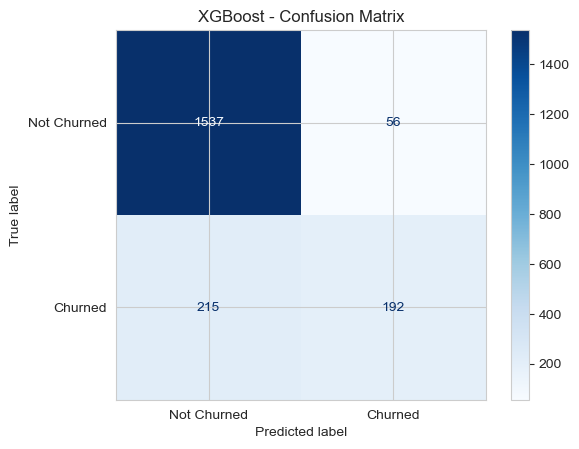

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost - Confusion Matrix")
save_fig("eval-XGBoost-confusion-matrix", "evaluation")
plt.show()

#### ROC Curve & AUC

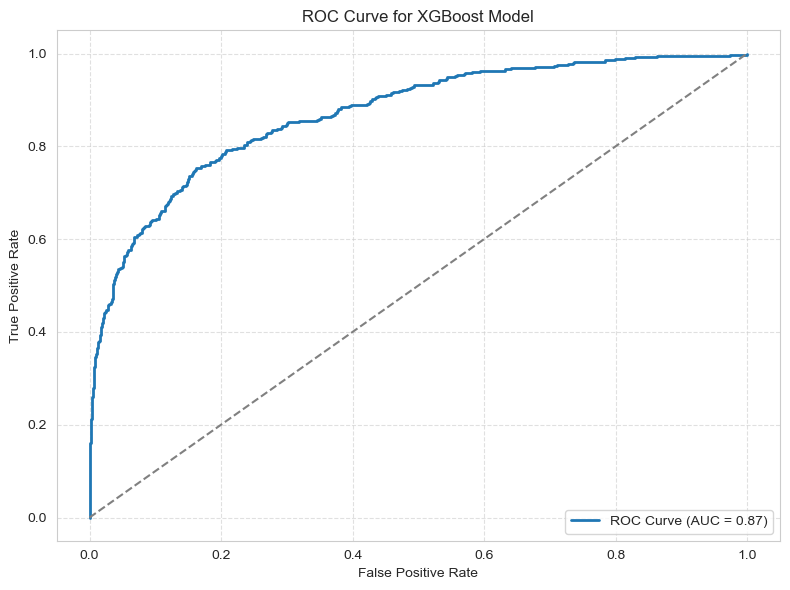

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_fig("eval-XGBoost-ROC-AUC", "evaluation")
plt.show()

#### Precision-Recall

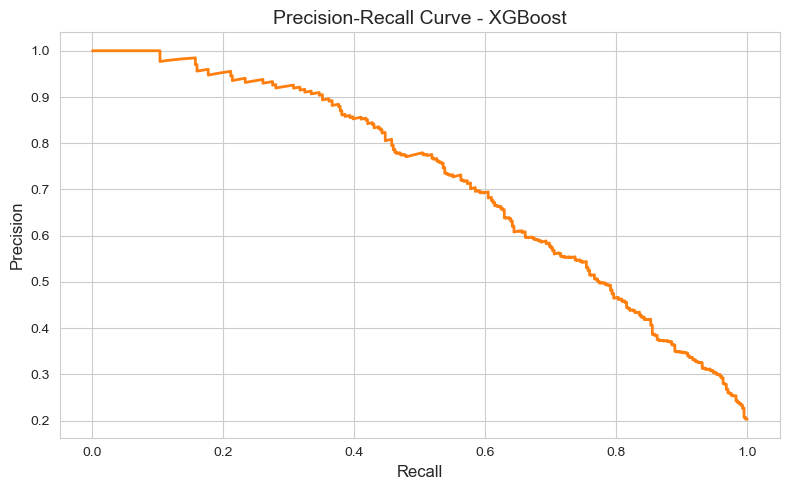

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color="#ff7f0e", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve - XGBoost", fontsize=14)
plt.tight_layout()
plt.grid(True)
save_fig("eval-XGBoost-Precision-Recall", "evaluation")
plt.show()

#  XGBoost Model Evaluation Summary


##  Test Set Evaluation Results

###  Confusion Matrix

|                | Predicted Not Churned | Predicted Churned |
|----------------|------------------------|--------------------|
| **Actual Not Churned** | 1537                   | 56                 |
| **Actual Churned**     | 215                    | 192                |

- **True Negatives (TN)**: 1537  
- **False Positives (FP)**: 56  
- **False Negatives (FN)**: 215  
- **True Positives (TP)**: 192

---

###  ROC Curve (AUC = 0.87)
- The ROC curve shows strong separation between classes.
- AUC of 0.87 indicates **excellent classification performance**.

---

###  Precision-Recall Trade-off
- High precision at low recall (confident predictions).
- Precision drops as recall increases — typical trade-off behavior.
- Useful when business decisions require **high precision** or **high recall** depending on the case.

---

###  Classification Report

| Metric     | Not Churned | Churned |
|------------|-------------|---------|
| Precision  | 0.88        | 0.77    |
| Recall     | 0.96        | 0.47    |
| F1-Score   | 0.92        | 0.59    |

- **Accuracy**: `86%`
- **Macro Avg F1**: `0.75` (strongest among tested models so far)
- **Class Imbalance** still impacts recall for churned customers.

---

##  Insights

-  Performs **significantly better than Logistic Regression** and **slightly better than Random Forest**.
-  Still misses a noticeable portion of actual churners — could be improved via **threshold adjustment** or **hyperparameter tuning**.
-  Very good candidate for **further fine-tuning** and potentially ensembling later.
